In [1]:
import pandas as pd
import missingno as msno
import numpy as np
from missingpy import MissForest

In [34]:
file = '../../../../../../dataframes/enigh/HOGARES/df_09_clean.csv'

In [35]:
df = pd.read_csv(file)

In [36]:
df.head()

,huespedes,num_trab_d,acc_alim1,acc_alim2,acc_alim3,acc_alim4,acc_alim5,acc_alim6,alim17_1,alim17_2,...,remunera,transferen,parto_g,embarazo_g,negcua,est_alim,est_trans,bene_licon,diconsa,CVE_MUN
0,0,0,2,2,2,2,2,2,7,1,...,2,2,2,2,2,2100,700.0,2,1,2
1,0,0,2,2,2,2,2,2,7,3,...,2,1,2,2,2,900,20.0,2,1,2
2,0,0,2,2,2,2,2,2,4,2,...,2,2,2,2,2,1700,350.0,2,1,2
3,0,0,2,2,2,2,2,2,3,1,...,1,2,2,2,2,1200,300.0,2,9,2
4,0,0,2,2,2,2,2,2,7,7,...,2,1,2,2,2,3100,300.0,2,2,2


In [37]:
df_copy = df.copy()

In [40]:
df_copy[['anio_tvd','anio_licua', 'anio_refri', 'anio_estuf', 'anio_lavad', 'anio_planc']].astype(str)

,anio_tvd,anio_licua,anio_refri,anio_estuf,anio_lavad,anio_planc
0,15.0,10.0,6.0,7.0,9.0,14.0
1,nan,11.0,11.0,6.0,6.0,11.0
2,15.0,14.0,12.0,12.0,14.0,14.0
3,15.0,12.0,10.0,10.0,13.0,15.0
4,13.0,14.0,nan,nan,nan,nan
5,14.0,13.0,96.0,6.0,1.0,11.0
6,15.0,13.0,8.0,6.0,6.0,15.0
7,16.0,13.0,95.0,93.0,96.0,14.0
8,16.0,15.0,14.0,15.0,15.0,nan
9,nan,13.0,13.0,15.0,6.0,15.0


In [32]:
df_copy.replace(to_replace=np.NaN,
                                  value= -1,
                                  inplace=True)

In [7]:
for column in df_copy.columns:
    df_copy[column] = df_copy[column].astype('int64')

In [8]:
df_copy.replace(to_replace=-1,
                                  value=np.NaN,
                                  inplace=True)

In [9]:
df_copy.shape

(1733, 79)

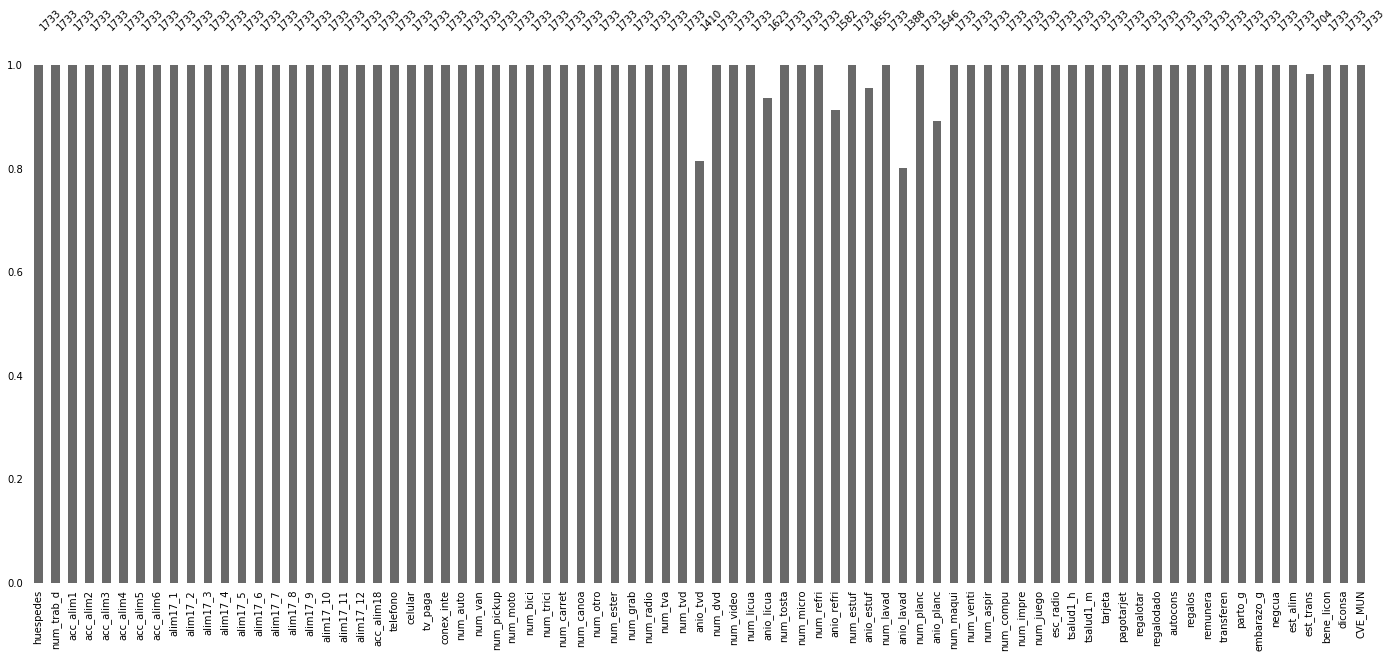

In [10]:
msno.bar(df_copy, fontsize=10)
#plt.xlabel('Columnas', fontsize=30)
#plt.ylabel('Observaciones', fontsize=30)
#plt.savefig('../../../images/envipe/df_tmod_vic_envipe2016_09_nan_ident.png', dpi=300)

In [11]:
df_copy.replace(to_replace=np.NaN,
                                  value= -1,
                                  inplace=True)

In [12]:
threshold = round(df_copy.shape[0]*1)
threshold

1733

In [13]:
l = []
for column in df_copy.columns:
    na_column =  df_copy[column].value_counts().get(-1)
    if(na_column != None):
        print(column, ': ', df_copy.shape[0] - na_column, ' - ', threshold)
        if (df_copy.shape[0] - na_column < threshold):
            l.append(column)

anio_tvd :  1410  -  1733
anio_licua :  1623  -  1733
anio_refri :  1582  -  1733
anio_estuf :  1655  -  1733
anio_lavad :  1388  -  1733
anio_planc :  1546  -  1733
est_trans :  1704  -  1733


In [14]:
l

['anio_tvd',
 'anio_licua',
 'anio_refri',
 'anio_estuf',
 'anio_lavad',
 'anio_planc',
 'est_trans']

In [15]:
df_copy[df_copy.columns[~df_copy.columns.isin(l)]].head()

,huespedes,num_trab_d,acc_alim1,acc_alim2,acc_alim3,acc_alim4,acc_alim5,acc_alim6,alim17_1,alim17_2,...,regalos,remunera,transferen,parto_g,embarazo_g,negcua,est_alim,bene_licon,diconsa,CVE_MUN
0,0,0,2,2,2,2,2,2,7,1,...,1,2,2,2,2,2,2100,2,1,2
1,0,0,2,2,2,2,2,2,7,3,...,1,2,1,2,2,2,900,2,1,2
2,0,0,2,2,2,2,2,2,4,2,...,1,2,2,2,2,2,1700,2,1,2
3,0,0,2,2,2,2,2,2,3,1,...,2,1,2,2,2,2,1200,2,9,2
4,0,0,2,2,2,2,2,2,7,7,...,1,2,1,2,2,2,3100,2,2,2


In [16]:
df_copy.replace(to_replace=-1,value=np.NaN,inplace=True)

In [17]:
imputer = MissForest()
X_imputed = imputer. fit_transform(df_copy)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6


In [18]:
df_copy_copy = df_copy.copy()

In [19]:
df_copy_copy = pd.DataFrame(data=X_imputed, columns=df_copy_copy.columns)

In [20]:
for column in df_copy_copy.columns:
    df_copy_copy[column] = df_copy_copy[column].astype('int64')

In [21]:
df_copy_copy.isnull().any().any()

False

In [22]:
df_copy_copy.shape

(1733, 79)

In [23]:
df.shape

(1733, 79)

In [26]:
list_ids = ['CVE_MUN']

In [27]:
df_copy_copy.drop(labels=list_ids, axis=1, inplace=True)

In [28]:
file = '../../../../../../dataframes/enigh/HOGARES/df_09_impute.csv'

In [28]:
file = '../../../../../../dataframes/enigh/HOGARES/df_09_impute.csv'

In [29]:
df_copy_copy.to_csv(file,index = False, header = True, sep = ',', encoding = 'utf-8')

In [30]:
l = []
bandera = np.NAN
for column in df_copy_copy.columns:
    if df_copy_copy[column].dtype == np.int64:
        bandera = 'entero'
    elif df_copy_copy[column].dtype == np.float64:
        bandera = 'flotante'
    else:
        bandera = 'otro'
    
    try:
        df_copy_copy[column] = df_copy_copy[column].astype('int64')
    except:
        l.append(column)
        
    print('COLUMNA: ', column)
    print('TIPO: ', bandera)
    print('NUNIQUE: ', df_copy_copy[column].nunique())
    print('UNIQUE: ', df_copy_copy[column].unique())
    print('VALUE COUNTS ', df_copy_copy[column].value_counts().sort_index())
    print('\n')

COLUMNA:  huespedes
TIPO:  entero
NUNIQUE:  1
UNIQUE:  [0]
VALUE COUNTS  0    1733
Name: huespedes, dtype: int64


COLUMNA:  num_trab_d
TIPO:  entero
NUNIQUE:  3
UNIQUE:  [0 1 2]
VALUE COUNTS  0    1717
1      14
2       2
Name: num_trab_d, dtype: int64


COLUMNA:  acc_alim1
TIPO:  entero
NUNIQUE:  2
UNIQUE:  [2 1]
VALUE COUNTS  1     469
2    1264
Name: acc_alim1, dtype: int64


COLUMNA:  acc_alim2
TIPO:  entero
NUNIQUE:  2
UNIQUE:  [2 1]
VALUE COUNTS  1     108
2    1625
Name: acc_alim2, dtype: int64


COLUMNA:  acc_alim3
TIPO:  entero
NUNIQUE:  2
UNIQUE:  [2 1]
VALUE COUNTS  1     289
2    1444
Name: acc_alim3, dtype: int64


COLUMNA:  acc_alim4
TIPO:  entero
NUNIQUE:  2
UNIQUE:  [2 1]
VALUE COUNTS  1     314
2    1419
Name: acc_alim4, dtype: int64


COLUMNA:  acc_alim5
TIPO:  entero
NUNIQUE:  2
UNIQUE:  [2 1]
VALUE COUNTS  1     135
2    1598
Name: acc_alim5, dtype: int64


COLUMNA:  acc_alim6
TIPO:  entero
NUNIQUE:  2
UNIQUE:  [2 1]
VALUE COUNTS  1     232
2    1501
Name: acc_alim

# limpiar 99s en años,días y meses de naciomiento

In [36]:
df_copy_copy_copy = df_copy_copy.copy()

In [40]:
df_copy_copy_copy[(df_copy_copy_copy.nac_anio == 9999)].shape

(29, 72)

In [38]:
df_copy_copy_copy[(df_copy_copy_copy.nac_mes == 99)].shape

(4901, 72)

In [39]:
df_copy_copy_copy[(df_copy_copy_copy.nac_dia == 99)].shape

(6036, 72)

In [42]:
df_copy_copy_copy.nac_anio.replace(to_replace=9999, 
                                   value=np.NaN, 
                                   inplace=True)


In [44]:
df_copy_copy_copy.nac_mes.replace(to_replace=99, 
                                   value=np.NaN, 
                                   inplace=True)


In [43]:
df_copy_copy_copy.nac_dia.replace(to_replace=99, 
                                   value=np.NaN, 
                                   inplace=True)


In [45]:
imputer = MissForest()
X_X_imputed = imputer. fit_transform(df_copy_copy_copy)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8


In [51]:
df_copy_copy = df_copy_copy_copy.copy()

In [52]:
df_copy_copy = pd.DataFrame(data=X_X_imputed, columns=df_copy_copy_copy.columns)

In [53]:
for column in df_copy_copy.columns:
    df_copy_copy[column] = df_copy_copy[column].astype('int64')

In [54]:
df_copy_copy.isnull().any().any()

False

In [55]:
df_copy_copy.shape

(76397, 72)

In [56]:
df.shape

(76397, 75)

In [63]:
list_edad = ["eda5c", "eda7c", "eda12c", "eda19c", ]

In [64]:
df_copy_copy.drop(labels=list_edad, axis=1, inplace=True)

In [66]:
file = "../../../../../dataframes/enoe/SDEMT/df_09_impute.csv"


In [67]:
df_copy_copy.to_csv(file,index = False, header = True, sep = ',', encoding = 'utf-8')

In [65]:
l = []
bandera = np.NAN
for column in df_copy_copy.columns:
    if df_copy_copy[column].dtype == np.int64:
        bandera = 'entero'
    elif df_copy_copy[column].dtype == np.float64:
        bandera = 'flotante'
    else:
        bandera = 'otro'
    
    try:
        df_copy_copy[column] = df_copy_copy[column].astype('int64')
    except:
        l.append(column)
        
    print('COLUMNA: ', column)
    print('TIPO: ', bandera)
    print('NUNIQUE: ', df_copy_copy[column].nunique())
    print('UNIQUE: ', df_copy_copy[column].unique())
    print('VALUE COUNTS ', df_copy_copy[column].value_counts().sort_index())
    print('\n')

COLUMNA:  est
TIPO:  entero
NUNIQUE:  4
UNIQUE:  [10 30 20 40]
VALUE COUNTS  10      635
20    35413
30    32529
40     7820
Name: est, dtype: int64


COLUMNA:  t_loc
TIPO:  entero
NUNIQUE:  4
UNIQUE:  [1 2 3 4]
VALUE COUNTS  1    71139
2     1491
3      740
4     3027
Name: t_loc, dtype: int64


COLUMNA:  sex
TIPO:  entero
NUNIQUE:  2
UNIQUE:  [1 2]
VALUE COUNTS  1    37074
2    39323
Name: sex, dtype: int64


COLUMNA:  eda
TIPO:  entero
NUNIQUE:  99
UNIQUE:  [46 48 23 18 36 31 10  9 32 42 40 75 15  8 43 35  0 68 37 27 33 16 21 85
 63 24 59 54 61 56 17 26 22 45 51 30 28  5  2 65  6  1 50 47 64 67 34 12
 52 25 20 19 11 91 53 71 14 13  7  3 44 60 78 89 69 84 57 62 29 77 66 39
 79 38 70 41 88 55 92 74 58  4 49 82 80 73 90 72 81 76 95 83 94 97 87 98
 93 86 96]
VALUE COUNTS  0      740
1      880
2      866
3      977
4      924
5     1002
6      967
7     1060
8     1104
9     1030
10    1116
11    1044
12    1086
13    1080
14    1113
15    1228
16    1203
17    1094
18    1174
19    120

In [62]:
list(df_copy_copy.columns)

['est',
 't_loc',
 'sex',
 'eda',
 'nac_dia',
 'nac_mes',
 'nac_anio',
 'l_nac_c',
 'cs_p12',
 'cs_p13_1',
 'cs_p13_2',
 'cs_p17',
 'e_con',
 'salario',
 'clase1',
 'clase2',
 'clase3',
 'pos_ocu',
 'seg_soc',
 'rama',
 'c_ocu11c',
 'ing7c',
 'dur9c',
 'emple7c',
 'medica5c',
 'buscar5c',
 'rama_est1',
 'rama_est2',
 'dur_est',
 'ambito1',
 'ambito2',
 'tue1',
 'tue2',
 'tue3',
 'busqueda',
 'd_ant_lab',
 'd_cexp_est',
 'dur_des',
 'sub_o',
 's_clasifi',
 'remune2c',
 'pre_asa',
 'tip_con',
 'dispo',
 'nodispo',
 'c_inac5c',
 'pnea_est',
 'niv_ins',
 'eda5c',
 'eda7c',
 'eda12c',
 'eda19c',
 'hij5c',
 'domestico',
 'anios_esc',
 'hrsocup',
 'ingocup',
 'ing_x_hrs',
 'tpg_p8a',
 'tcco',
 'cp_anoc',
 'imssissste',
 'ma48me1sm',
 'p14apoyos',
 'scian',
 't_tra',
 'emp_ppal',
 'tue_ppal',
 'trans_ppal',
 'mh_fil2',
 'mh_col',
 'sec_ins']